In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

In [2]:
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [4]:
x_mean=np.mean(X)
y_mean=np.mean(Y)

In [5]:
n=len(X)

num=0
den=0
for i in range(n):
    num+=(X[i]-x_mean)*(Y[i]-y_mean)
    den+=(X[i]-x_mean)**2
m=num/den
c=y_mean-(m*x_mean)
print(m,c)

0.26342933948939945 325.57342104944223


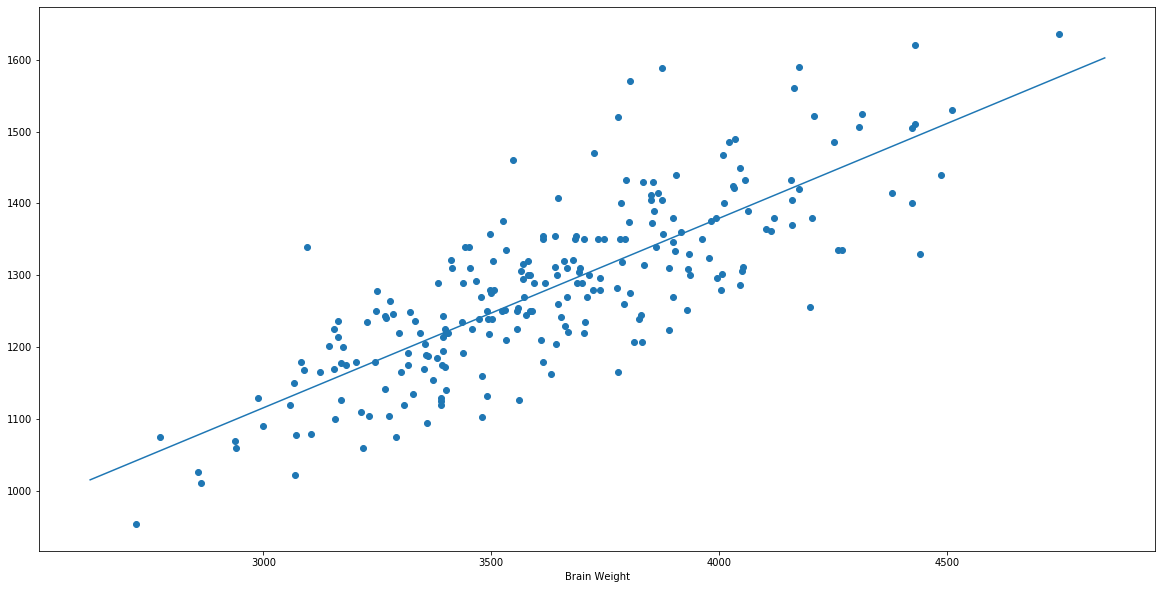

In [6]:
max_x=np.max(X)+100
min_x=np.min(X)-100
x=np.linspace(min_x,max_x,1000)
y=m*x+c
plt.plot(x,y)
plt.scatter(X,Y)
plt.xlabel('Head Size')
plt.xlabel('Brain Weight')
plt.show()

In [7]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred=c+m*X[i]
    ss_t+=(Y[i]-y_mean)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [11]:
X=X.reshape((n,1))
reg=LinearRegression()
reg_rf=RandomForestRegressor()
reg=reg.fit(X,Y)
reg_rf=reg_rf.fit(X,Y)
y_pred=reg.predict(X)
y_pred1=reg_rf.predict(X)
mse=mean_squared_error(Y,y_pred)
mse1=mean_squared_error(Y,y_pred1)
rmse=np.sqrt(mse)
rmse1=np.sqrt(mse1)
print(rmse,rmse1)

72.1206213783709 37.67350949273248
